In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

datadir="D:\Desktop\sem6\Deep\Project_Cat _Breed_Classifier\Pics"
categories=["Bengal", "Bombay", "Ragdoll"]
        
        


In [2]:
training_data=[]
img_size=70
def create_training_data():
    for category in categories:
        path=os.path.join(datadir, category)
        class_num=categories.index(category)
        for img in os.listdir(path): 
            img_array=cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) 
            new_array=cv2.resize(img_array, (img_size, img_size)) 
            training_data.append([new_array, class_num])

create_training_data()   
        
    

In [3]:
import random
random.shuffle(training_data)

In [4]:
x=[]
y=[]
for features, label in training_data:
    x.append(features)
    y.append(label)    

x=np.array(x).reshape(-1, img_size, img_size,1)


In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

x=x/255.0
y_label=y
y=to_categorical(y)

model=Sequential()
model.add(Conv2D(64, (3,3), input_shape=x.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(3))
model.add(Activation("softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
classifier=model.fit(x, y, batch_size=20, validation_split=0.1, epochs=10)





C:\Users\chandralekha\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 540 samples, validate on 60 samples
Epoch 1/10
540/540 [==============================] - 4s 8ms/sample - loss: 0.8313 - acc: 0.6130 - val_loss: 0.7487 - val_acc: 0.6833
Epoch 2/10
540/540 [==============================] - 4s 7ms/sample - loss: 0.6024 - acc: 0.7370 - val_loss: 0.4633 - val_acc: 0.8500
Epoch 3/10
540/540 [==============================] - 3s 6ms/sample - loss: 0.4116 - acc: 0.8463 - val_loss: 0.3784 - val_acc: 0.8500
Epoch 4/10
540/540 [==============================] - 3s 5ms/sample - loss: 0.3393 - acc: 0.8685 - val_loss: 0.6319 - val_acc: 0.7333
Epoch 5/10
540/540 [==============================] - 3s 6ms/sample - loss: 0.2619 - acc: 0.9148 - val_loss: 0.5886 - val_acc: 0.7667
Epoch 6/10
540/540 [==============================] - 3s 6ms/sample - loss: 0.2236 - acc: 0.9111 - val_loss: 0.3240 - val_acc: 0.8833
Epoch 7/10
540/540 [=============

In [6]:
y_pred=model.predict_classes(x)

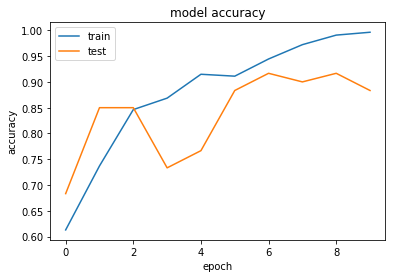

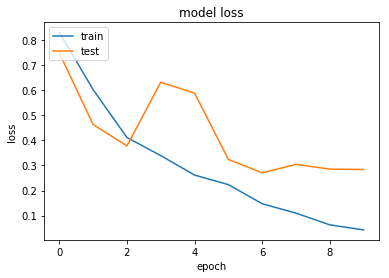

In [7]:
plt.plot(classifier.history['acc'])
plt.plot(classifier.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(classifier.history['loss'])
plt.plot(classifier.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Confusion matrix, without normalization
[[194   1   5]
 [  0 200   0]
 [  2   0 198]]


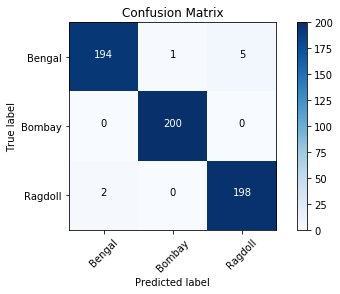

In [8]:
from sklearn.metrics import confusion_matrix
import itertools
cm=confusion_matrix(y_label,y_pred)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plot_confusion_matrix(cm,["Bengal", "Bombay", "Ragdoll"],title="Confusion Matrix")
